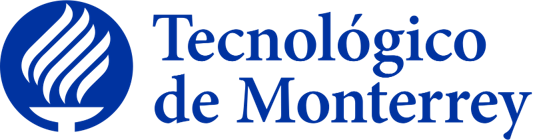

---
# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Movilidad Autónoma**
### Profesor Titular: Dr. David Antonio Torres
### Profesor Tutor: Iván Olmos Pineda

###Equipo 22:
* A01206674 - Isaac Manríquez Calderón
* A01568089 - Carlos Mario Jiménez Pizarro
* A01630948 - Mariana González Bravo
* A01793672 - Freddy Armendariz Herrera
* A01795050 - Julio César García Escoto
---

---
## **Actividad 4.1 - Clasificación con Keras**


### **Importación de Librerías**

In [ ]:
# Descargar Data Set
# ====================================================================
import requests, zipfile
from io import BytesIO
#from zipfile import ZipFile
import glob

# Manipulación y Tratamiento de Datos
# ====================================================================
import pandas as pd
import numpy as np

# Gráficos
# ====================================================================
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

# Procesamiento de Imágenes
# ====================================================================
import cv2
from skimage.feature import hog

# Preprocesado y Modelado
# ====================================================================
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
# Definicion de Red Neuronal
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Lectura de Datasets**

https://github.com/vinay0410/Pedestrian_Detection/tree/master?tab=readme-ov-file

In [ ]:
#vehicle = glob.glob("/content/drive/MyDrive/Colab Notebooks/Movilidad Autonoma/Imagenes/data_svm/vehicles/**/*.png")
#no_vehicle = glob.glob("/content/drive/MyDrive/Colab Notebooks/Movilidad Autonoma/Imagenes/data_svm/non-vehicles/**/*.png")
pedestrian = glob.glob('/content/drive/MyDrive/Colab Notebooks/Movilidad Autonoma/Imagenes/train_64x128_H96/pos/*.png')
nopedestrian = glob.glob('/content/drive/MyDrive/Colab Notebooks/Movilidad Autonoma/Imagenes/train_64x128_H96/neg/*.png')

### **Descripción de Dataset**

In [ ]:
len(pedestrian)

2416

In [ ]:
len(nopedestrian)

912

### **Extracción de Features del HOG**

In [ ]:
def HOGFeatures(pictures, width=64, height=64):
  vehicle_hog_accum = []
  new_size = (width, height) #las imagenes se redimensionan a 64x64
  for i in pictures: # ciclo para la extraccion de las caracteristicas y la imagen hog
    #img_color = mpimg.imread(i)
    #img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
    img_gray = cv2.imread(i,0) # Cambio a grises la imagen
    img_resized = cv2.resize(img_gray, new_size) # Redimension de la imagen
    #img_color = cv2.imread(i, cv2.IMREAD_COLOR)
    #img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    vehicle_hog_feature, vehicle_hog_img = hog(img_resized,
                                               orientations = 11,
                                               pixels_per_cell = (16,16),#16*16
                                               cells_per_block = (2,2),#2*2
                                               transform_sqrt = False,
                                               visualize = True,
                                               feature_vector = True)
    vehicle_hog_accum.append(vehicle_hog_feature)

  return vehicle_hog_accum

In [ ]:
pedestrians = HOGFeatures(pedestrian)

In [ ]:
X_pedestrians = np.vstack(pedestrians).astype(np.float64)
y_pedestrians = np.ones(len(X_pedestrians)) # Se asignan etiquetas de 1 a Y del tamaño del dataset a las imagenes que si se observan peatones.
print('Tamaño de X_pedestrians:',X_pedestrians.shape)
print('Tamaño de y_pedestrians:',y_pedestrians.shape)

Tamaño de X_pedestrians: (2416, 396)
Tamaño de y_pedestrians: (2416,)


In [ ]:
nopedestrians = HOGFeatures(nopedestrian)

In [ ]:
X_nopedestrians = np.vstack(nopedestrians).astype(np.float64)
y_nopedestrians = np.zeros(len(X_nopedestrians)) # Se asignan etiquetas de 0 a Y del tamaño del dataset a las imagenes donde no se observan peatones.
print('Tamaño de X_nopedestrians:',X_nopedestrians.shape)
print('Tamaño de y_nopedestrians:',y_nopedestrians.shape)

Tamaño de X_nopedestrians: (912, 396)
Tamaño de y_nopedestrians: (912,)


### **Combinación de Conjuntos de Datos**

In [ ]:
X = np.vstack((X_pedestrians,X_nopedestrians))
print('Tamaño de X:',X.shape)

Tamaño de X: (3328, 396)


In [ ]:
y = np.hstack((y_pedestrians,y_nopedestrians))
print('Tamaño de y:',y.shape)

Tamaño de y: (3328,)


### **Escalamiento de las Características**

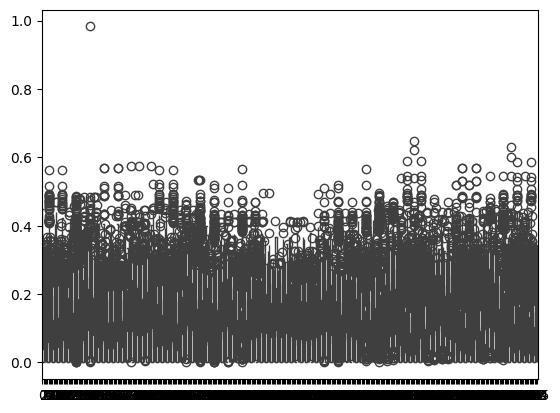

In [ ]:
# Grafico de cajas
sns.boxplot(data = X, orient="v")
plt.show()

La distribucion de los datos se encuentra entre 0 y 0.6, por lo que nos es necesario aplicar un escalamiento sobre las caracteristicas.

### **Generación de Conjuntos de Entrenamiento y Prueba**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) #Se ajusta el tamaño de la muestra que se usara
# como prueba a 25% de los datos
print('Tamaño de X_train:',X_train.shape)
print('Tamaño de X_test:',X_test.shape)

Tamaño de X_train: (2496, 396)
Tamaño de X_test: (832, 396)


### **Definición de Red Neuronal**

In [ ]:
model = Sequential()
# capa de oculta con 30 nodos
model.add(Dense(units=30, input_dim=396, activation='relu'))
# capa oculta con 15 neuronas
model.add(Dense(units=15, activation='relu'))
# capa oculta con 10 neuronas
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=5, activation='relu'))
# capa de salida con una neurona
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy',  metrics=['accuracy'])

In [ ]:
hist = model.fit(x=X_train, y=y_train, verbose=2, batch_size=50,epochs=100, shuffle='true')

Epoch 1/100
50/50 - 4s - loss: 0.3823 - accuracy: 0.8201 - 4s/epoch - 80ms/step
Epoch 2/100
50/50 - 0s - loss: 0.2497 - accuracy: 0.9303 - 153ms/epoch - 3ms/step
Epoch 3/100
50/50 - 0s - loss: 0.2106 - accuracy: 0.9335 - 162ms/epoch - 3ms/step
Epoch 4/100
50/50 - 0s - loss: 0.1917 - accuracy: 0.9355 - 170ms/epoch - 3ms/step
Epoch 5/100
50/50 - 0s - loss: 0.1674 - accuracy: 0.9467 - 169ms/epoch - 3ms/step
Epoch 6/100
50/50 - 0s - loss: 0.1471 - accuracy: 0.9547 - 158ms/epoch - 3ms/step
Epoch 7/100
50/50 - 0s - loss: 0.1436 - accuracy: 0.9567 - 164ms/epoch - 3ms/step
Epoch 8/100
50/50 - 0s - loss: 0.1286 - accuracy: 0.9587 - 151ms/epoch - 3ms/step
Epoch 9/100
50/50 - 0s - loss: 0.1264 - accuracy: 0.9595 - 152ms/epoch - 3ms/step
Epoch 10/100
50/50 - 0s - loss: 0.1391 - accuracy: 0.9499 - 162ms/epoch - 3ms/step
Epoch 11/100
50/50 - 0s - loss: 0.1457 - accuracy: 0.9439 - 159ms/epoch - 3ms/step
Epoch 12/100
50/50 - 0s - loss: 0.1147 - accuracy: 0.9583 - 162ms/epoch - 3ms/step
Epoch 13/100
50

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                11910     
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
 dense_3 (Dense)             (None, 5)                 55        
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 12596 (49.20 KB)
Trainable params: 12596 (49.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Text(0.5, 0, 'Epoca')

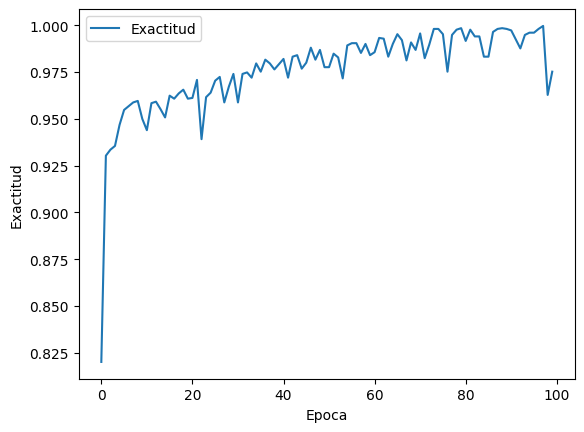

In [ ]:
# Exactitud del modelo
plt.plot(hist.history['accuracy'])
plt.legend(['Exactitud'])
plt.ylabel('Exactitud')
plt.xlabel('Epoca')

Text(0.5, 0, 'Epoca')

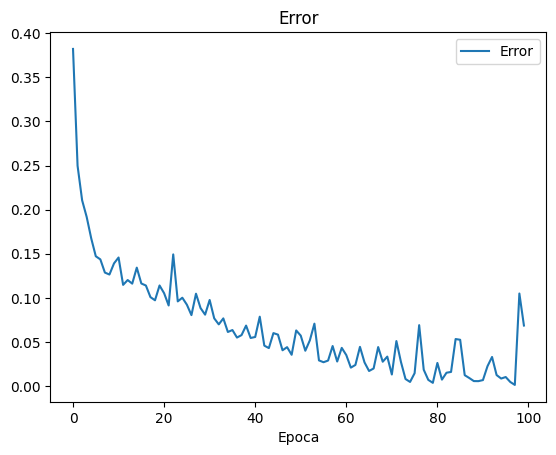

In [ ]:
# Función de pérdida
plt.plot(hist.history['loss'])
plt.legend(['Error'])
plt.title('Error')
plt.xlabel('Epoca')

In [ ]:
# Se calculan las predicciones del modelo para graficar la matriz de confusión
# Se compara contra 0.5 para determinar si es clase 0 ó clase 1
# ya que la salida que da la función Sigmoid es continua entre 0 y 1
y_predict = (model.predict(X_test) > 0.5).astype("int32")

26/26 [==============================] - 0s 2ms/step


In [ ]:
# Definición de función para encontrar matriz de confusión

def mi_cm(yreal, ypred):

  cm = confusion_matrix(yreal, ypred)
  txt = ['Verdaderos Negativos','Falsos Positivos','Falsos Negativos','Verdaderos Positivos']
  short = ["( VN )","( FP )","( FN )","( VP )"]
  frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
  porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]
  labels = [f"{v1}\n{v2}\n{v3}\n{v4}" for v1, v2, v3, v4 in zip(txt,short,frecuencia,porcentaje)]
  labels = np.asarray(labels).reshape(2,2)
  ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=True)
  ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
  plt.show()

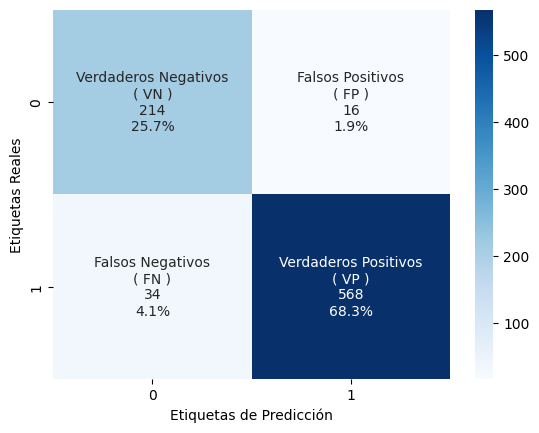

In [ ]:
# Matriz de Confusión para Evaluación del Modelo
mi_cm(y_test, y_predict)